<a href="https://colab.research.google.com/github/Am1rTl/Info/blob/main/CU_GK_Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Генерация данныз

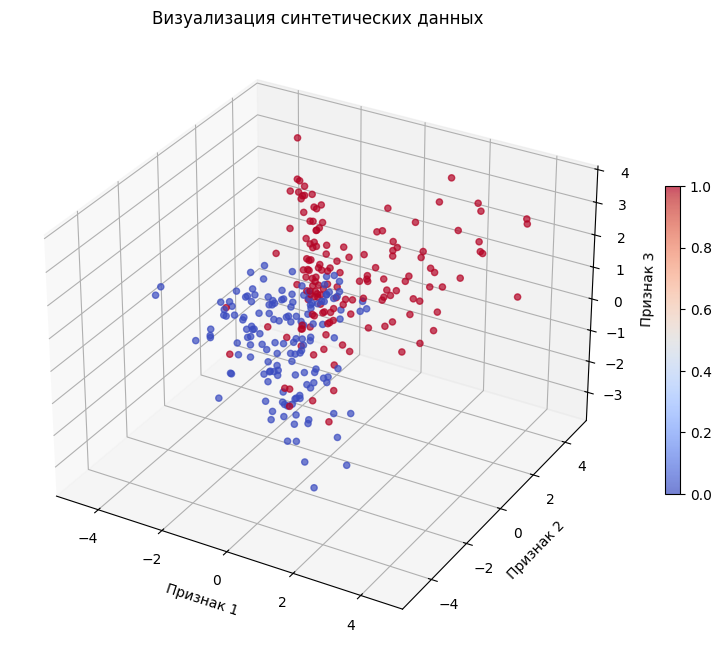

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

X, y = make_classification(
    n_samples=300,
    n_features=3,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42

)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Признак 1')
ax.set_ylabel('Признак 2')
ax.set_zlabel('Признак 3')
ax.set_title('Визуализация синтетических данных')

plt.colorbar(scatter, ax=ax, shrink=0.5)
plt.show()

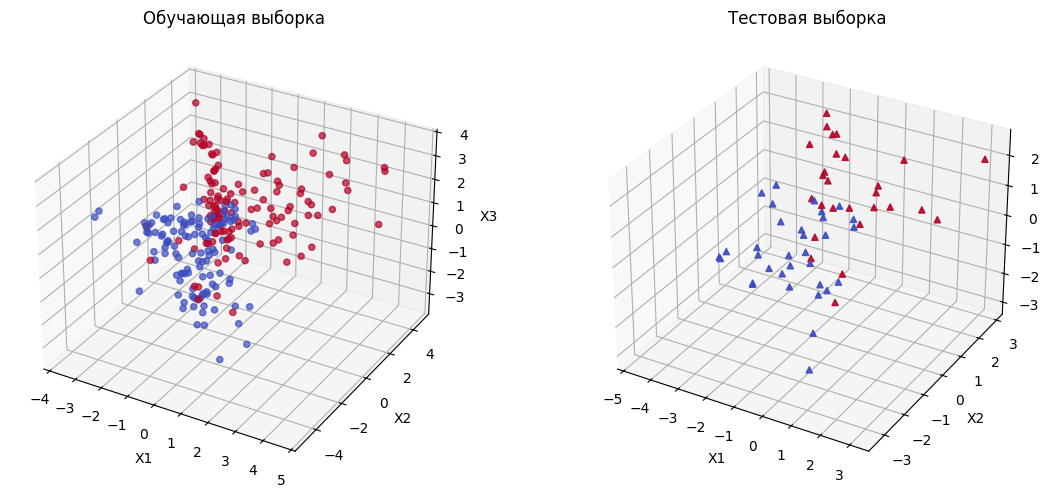

In [ ]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='coolwarm', marker='o', alpha=0.7)
ax1.set_title('Обучающая выборка')
ax1.set_xlabel('X1'); ax1.set_ylabel('X2'); ax1.set_zlabel('X3')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap='coolwarm', marker='^', alpha=0.9)
ax2.set_title('Тестовая выборка')
ax2.set_xlabel('X1'); ax2.set_ylabel('X2'); ax2.set_zlabel('X3')

plt.tight_layout()
plt.show()

# Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_[0]

for i, coef in enumerate(coefficients):
    print(f"Коэффициент для признака {i+1}: {coef:.3f}")

print(f"\nСвободный член (intercept): {intercept:.3f}")

print("\nВажность признаков (по абсолютному значению коэффициентов):")
feature_importance = sorted(zip(['Признак 1', 'Признак 2', 'Признак 3'], abs(coefficients)),
                           key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance:
    print(f"{feature}: {importance:.3f}")

Коэффициент для признака 1: 0.626
Коэффициент для признака 2: 1.131
Коэффициент для признака 3: 0.356

Свободный член (intercept): 0.156

Важность признаков (по абсолютному значению коэффициентов):
Признак 2: 1.131
Признак 1: 0.626
Признак 3: 0.356


In [ ]:
def plot_classification_errors(X_test, y_test, y_pred, algorithm_name):
    """
    Визуализирует ошибки классификации на 3D графике

    Parameters:
    X_test: тестовые признаки
    y_test: истинные метки
    y_pred: предсказанные метки
    algorithm_name: название алгоритма для заголовка
    """
    correct_indices = y_test == y_pred
    incorrect_indices = y_test != y_pred

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter_correct = ax.scatter(X_test[correct_indices, 0],
                                 X_test[correct_indices, 1],
                                 X_test[correct_indices, 2],
                                 c=y_test[correct_indices],
                                 cmap='coolwarm',
                                 marker='o',
                                 s=60,
                                 alpha=0.7,
                                 label='Правильно классифицированные')

    scatter_incorrect = ax.scatter(X_test[incorrect_indices, 0],
                                   X_test[incorrect_indices, 1],
                                   X_test[incorrect_indices, 2],
                                   c=y_test[incorrect_indices],
                                   cmap='coolwarm',
                                   marker='X',
                                   s=100,
                                   alpha=1.0,
                                   edgecolors='black',
                                   linewidths=1,
                                   label='Ошибки классификации')

    ax.set_xlabel('Признак 1')
    ax.set_ylabel('Признак 2')
    ax.set_zlabel('Признак 3')
    ax.set_title(f'Визуализация классификации ({algorithm_name})\n(Крестики - ошибки)')

    ax.legend()

    plt.colorbar(scatter_correct, ax=ax, shrink=0.5, label='Класс')

    plt.show()

    # Статистика по ошибкам
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Алгоритм: {algorithm_name}")
    print(f"Всего примеров в тестовой выборке: {len(y_test)}")
    print(f"Количество ошибок классификации: {sum(incorrect_indices)}")
    print(f"Точность модели: {accuracy:.3f}")

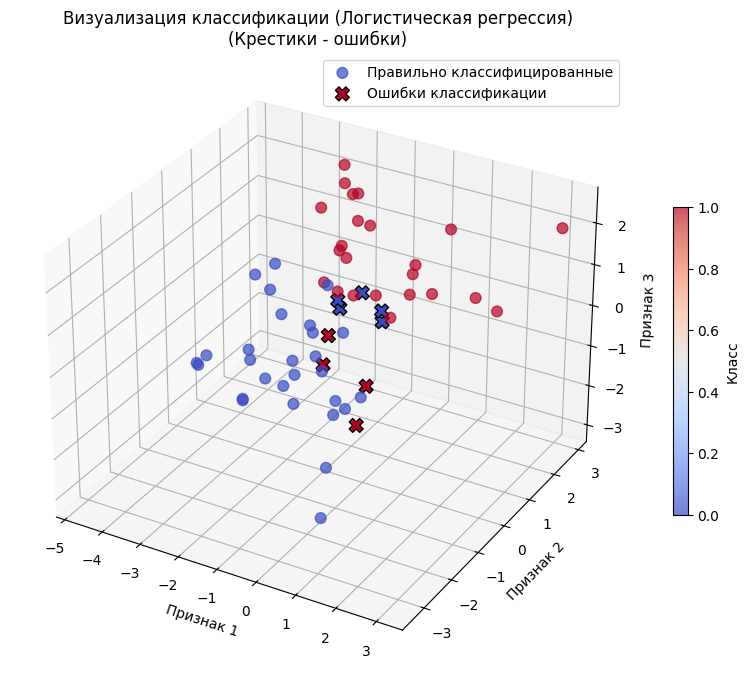

Алгоритм: Логистическая регрессия
Всего примеров в тестовой выборке: 60
Количество ошибок классификации: 9
Точность модели: 0.850


In [ ]:
plot_classification_errors(X_test, y_test, y_pred, "Логистическая регрессия")

# Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

tree_model = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Точность модели: {acc:.2f}")



Точность модели: 0.80


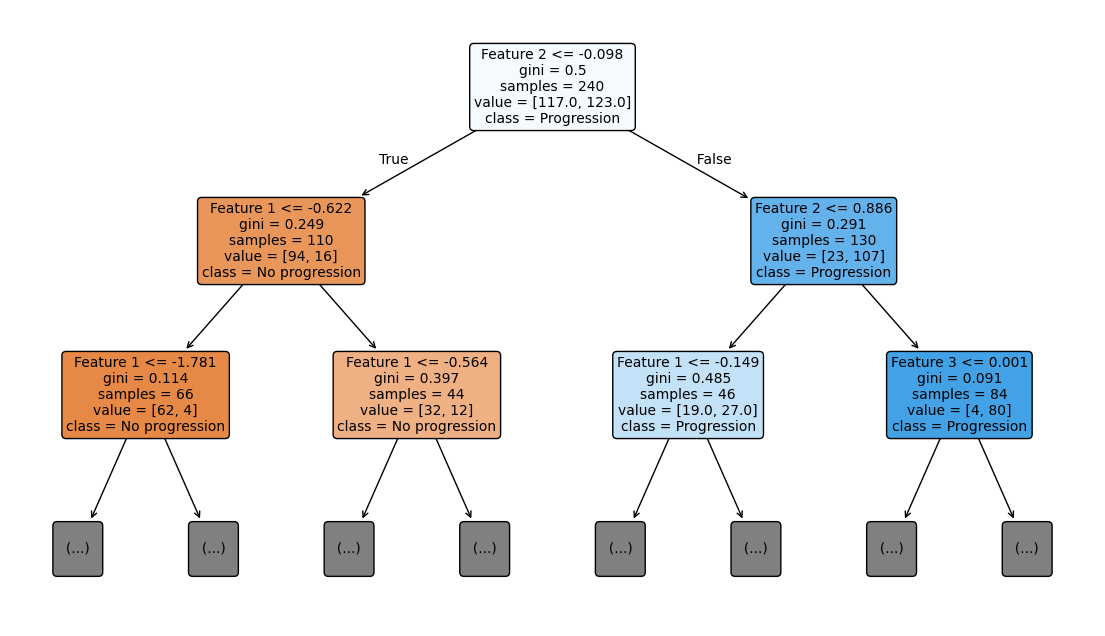

Feature 1: 0.202
Feature 2: 0.739
Feature 3: 0.059


In [ ]:
plt.figure(figsize=(14, 8))
plot_tree(
    tree_model,
    max_depth=2,
    feature_names=[f"Feature {i}" for i in range(1, 4)],  #
    class_names=["No progression", "Progression"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

importances = tree_model.feature_importances_
for i, imp in enumerate(importances):
    print(f"Feature {i+1}: {imp:.3f}")

In [ ]:
importances

array([0.20197732, 0.73897922, 0.05904345])

In [ ]:
sorted_indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)

for i in sorted_indices:
    print(f"Feature {i+1}: {importances[i]:.3f}")

Feature 2: 0.739
Feature 1: 0.202
Feature 3: 0.059


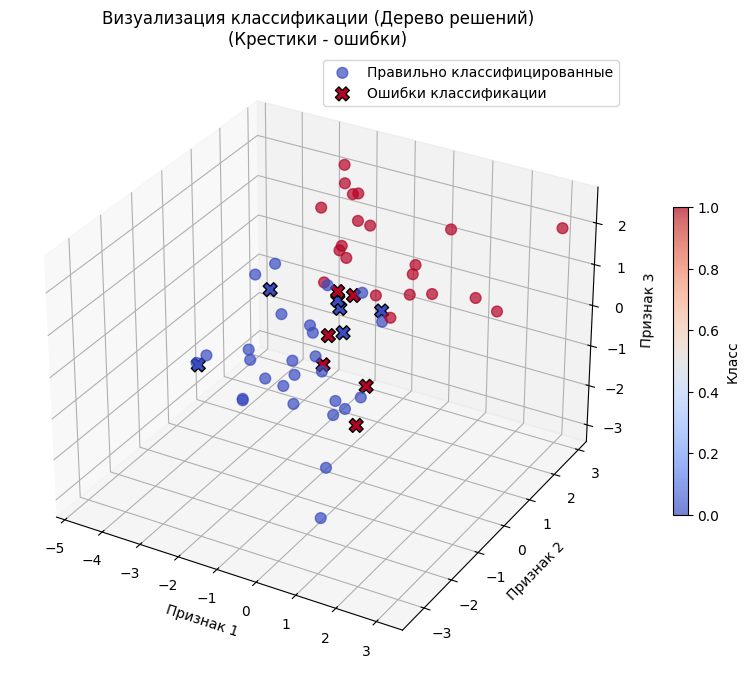

Алгоритм: Дерево решений
Всего примеров в тестовой выборке: 60
Количество ошибок классификации: 12
Точность модели: 0.800


In [ ]:
plot_classification_errors(X_test, y_test, y_pred, "Дерево решений")

# kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.92


Оптимальное значение k: 1


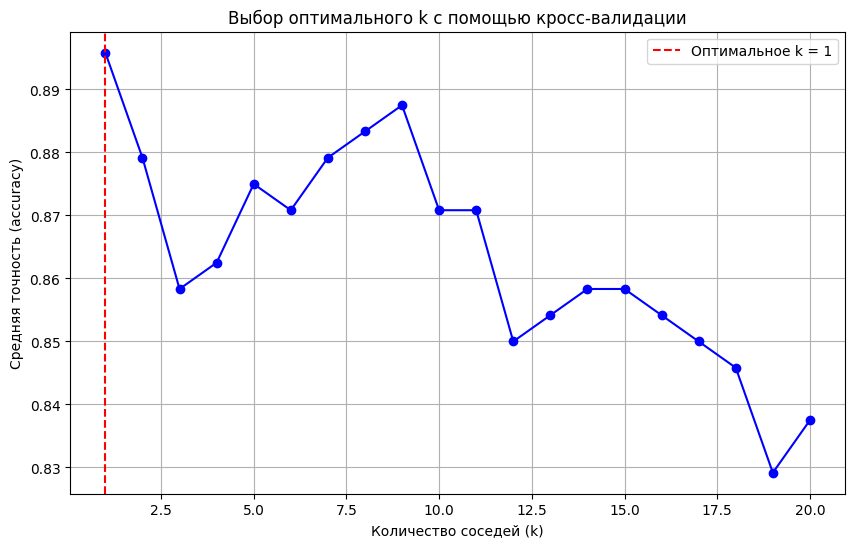

Точность на тестовой выборке с k=1: 0.88


In [ ]:
from sklearn.model_selection import cross_val_score

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = k_values[np.argmax(cv_scores)]
print(f"Оптимальное значение k: {optimal_k}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Средняя точность (accuracy)')
plt.title('Выбор оптимального k с помощью кросс-валидации')
plt.axvline(optimal_k, color='r', linestyle='--', label=f'Оптимальное k = {optimal_k}')
plt.legend()
plt.grid()
plt.show()

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
test_accuracy = knn_optimal.score(X_test, y_test)
print(f"Точность на тестовой выборке с k={optimal_k}: {test_accuracy:.2f}")

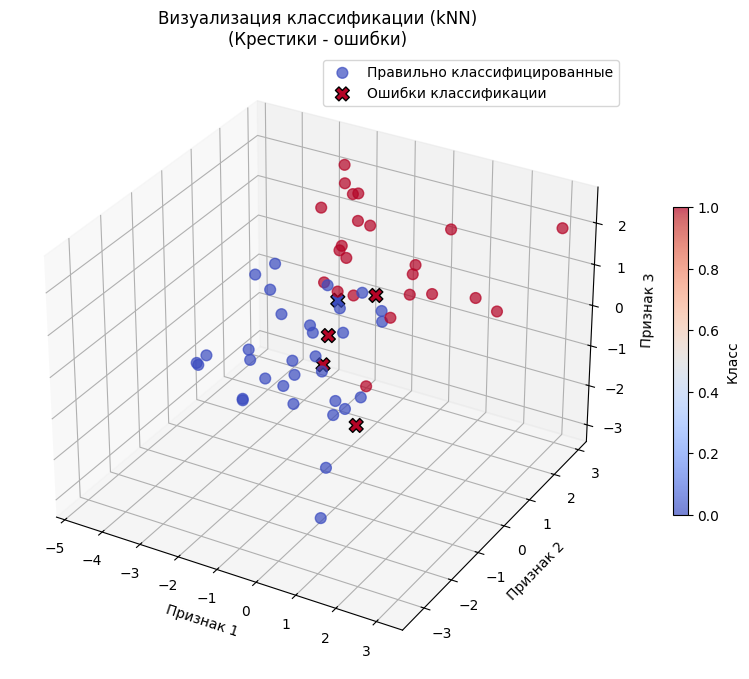

Алгоритм: kNN
Всего примеров в тестовой выборке: 60
Количество ошибок классификации: 5
Точность модели: 0.917


In [ ]:
plot_classification_errors(X_test, y_test, y_pred, "kNN")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.88


 # Метод опорных векторов

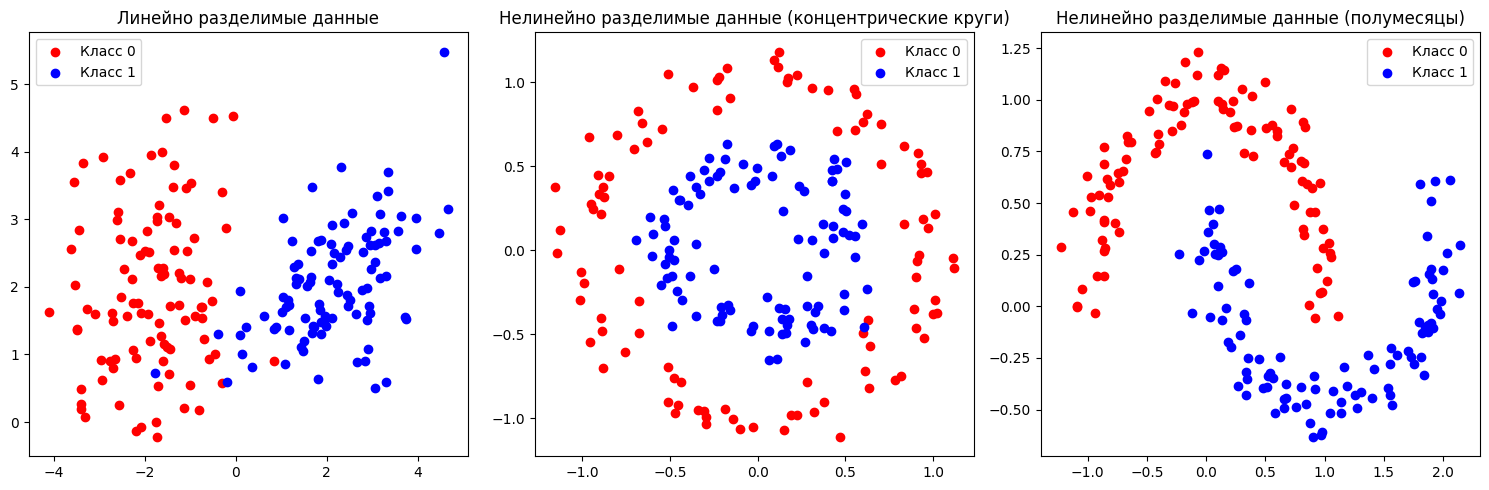

In [ ]:
from sklearn.datasets import make_classification,  make_circles, make_moons

X_linear, y_linear = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                                         n_clusters_per_class=1, class_sep=2.0, random_state=42)

X_rbf, y_rbf = make_circles(n_samples=200, factor=0.5, noise=0.1, random_state=42)

X_poly, y_poly = make_moons(n_samples=200, noise=0.1, random_state=42)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(X_linear[y_linear == 0][:, 0], X_linear[y_linear == 0][:, 1], color='red', label='Класс 0')
axs[0].scatter(X_linear[y_linear == 1][:, 0], X_linear[y_linear == 1][:, 1], color='blue', label='Класс 1')
axs[0].set_title("Линейно разделимые данные")
axs[0].legend()

axs[1].scatter(X_rbf[y_rbf == 0][:, 0], X_rbf[y_rbf == 0][:, 1], color='red', label='Класс 0')
axs[1].scatter(X_rbf[y_rbf == 1][:, 0], X_rbf[y_rbf == 1][:, 1], color='blue', label='Класс 1')
axs[1].set_title("Нелинейно разделимые данные (концентрические круги)")
axs[1].legend()

axs[2].scatter(X_poly[y_poly == 0][:, 0], X_poly[y_poly == 0][:, 1], color='red', label='Класс 0')
axs[2].scatter(X_poly[y_poly == 1][:, 0], X_poly[y_poly == 1][:, 1], color='blue', label='Класс 1')
axs[2].set_title("Нелинейно разделимые данные (полумесяцы)")
axs[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
def plot_decision_boundary(X, y, model, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_title(title)

def evaluate_kernels(X, y, dataset_name):
    kernels = ['linear', 'rbf', 'poly']
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for i, kernel in enumerate(kernels):
        if kernel == 'poly':
            model = SVC(kernel=kernel, degree=3, random_state=42)
        else:
            model = SVC(kernel=kernel, random_state=42)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        plot_decision_boundary(X_test, y_test, model, f"{kernel.capitalize()} Kernel\nAccuracy: {accuracy:.2f}", axes[i])

    fig.suptitle(f"Comparison of Kernels on {dataset_name}", fontsize=16)
    plt.tight_layout()
    plt.show()

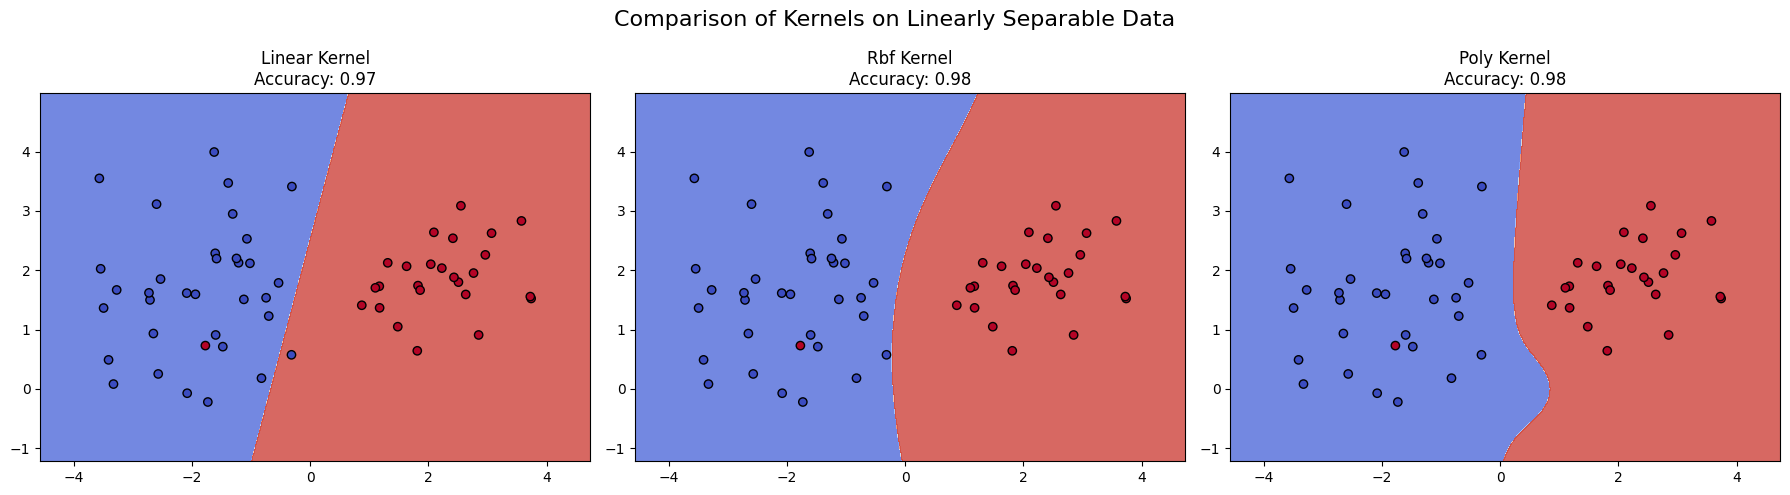

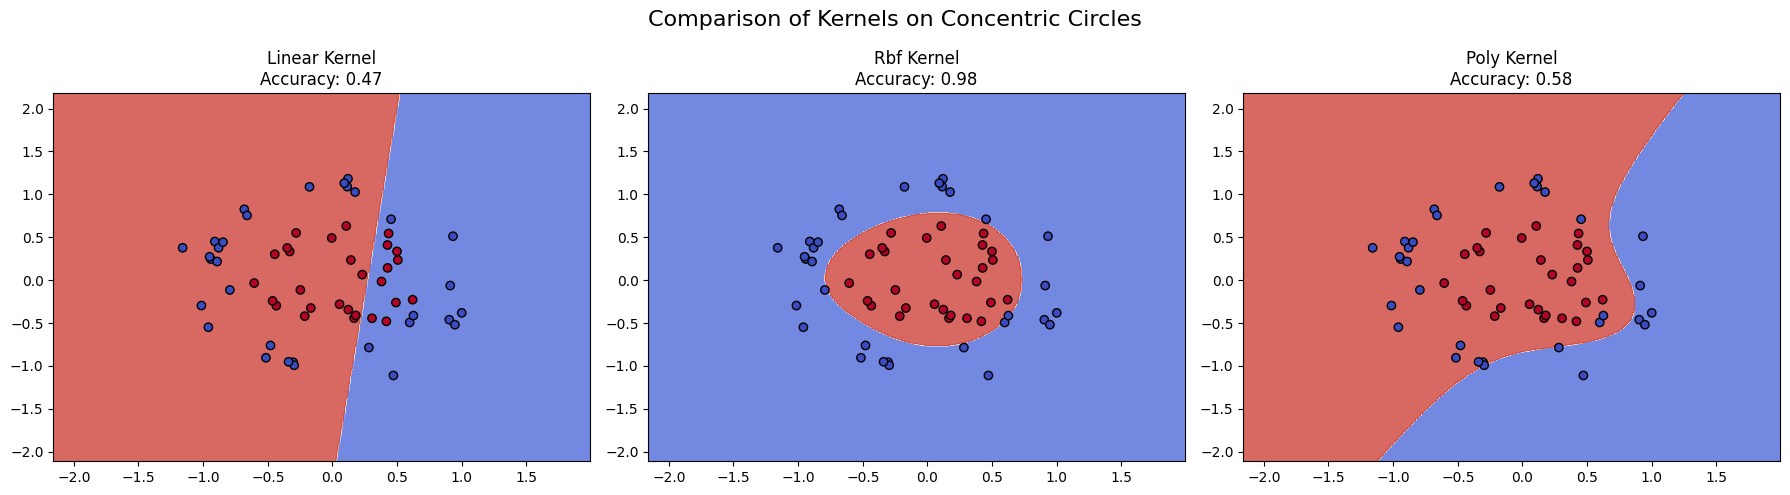

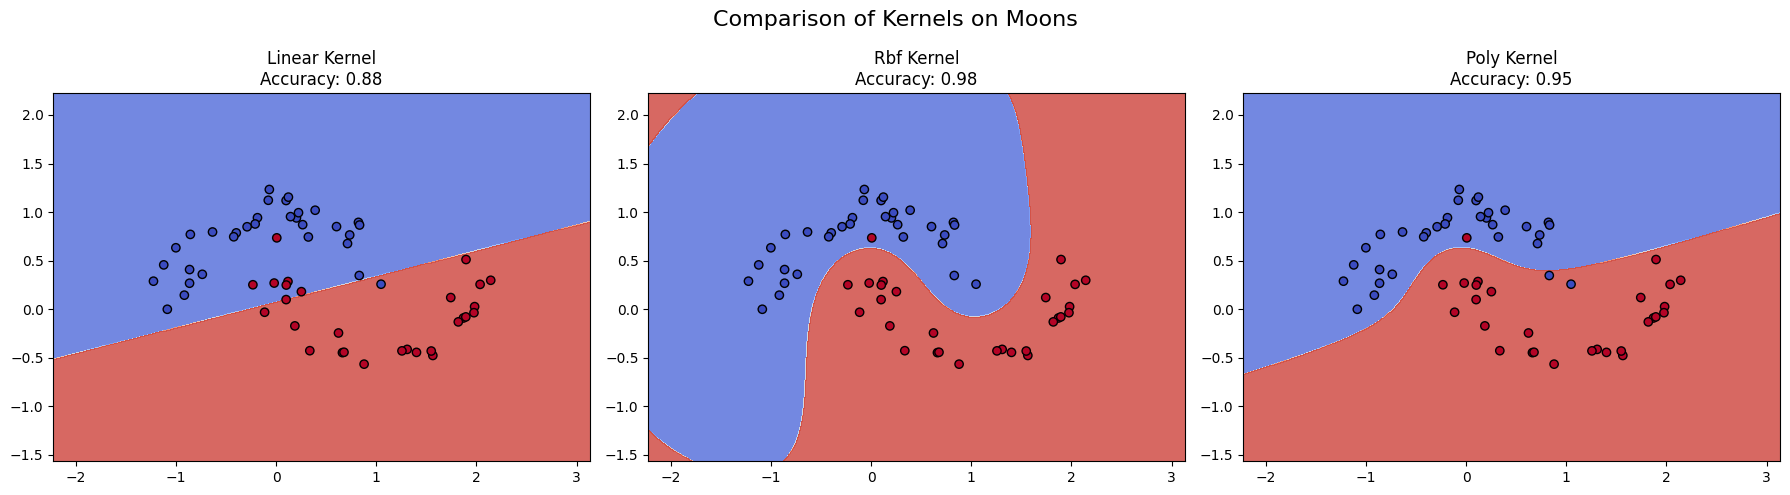

In [ ]:
evaluate_kernels(X_linear, y_linear, "Linearly Separable Data")

evaluate_kernels(X_rbf, y_rbf, "Concentric Circles")

evaluate_kernels(X_poly, y_poly, "Moons")

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Точность SVM (RBF-ядро): {accuracy:.3f}")

Точность SVM (RBF-ядро): 0.833


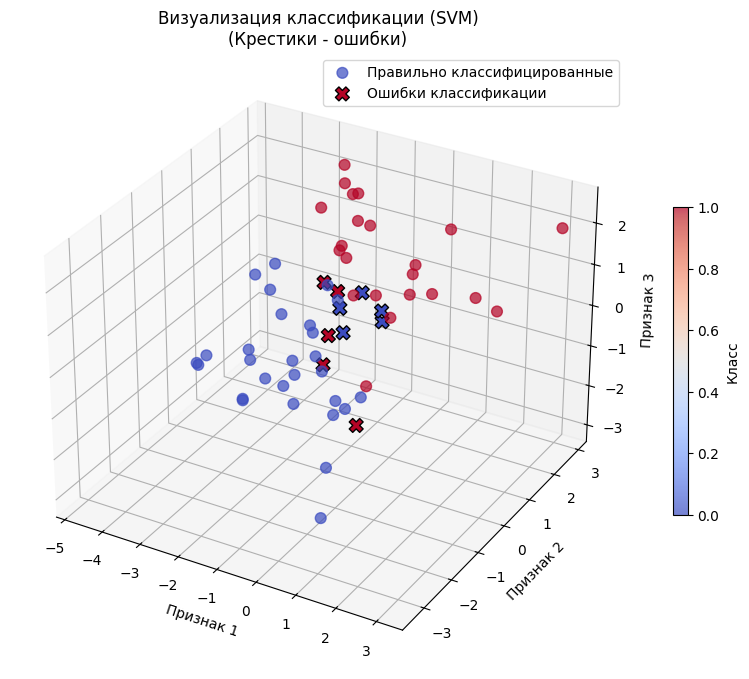

Алгоритм: SVM
Всего примеров в тестовой выборке: 60
Количество ошибок классификации: 10
Точность модели: 0.833


In [ ]:
plot_classification_errors(X_test, y_test, y_pred, "SVM")

# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

base_estimator = DecisionTreeClassifier(random_state=0)

bagging = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=10,
    random_state=42
)

bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

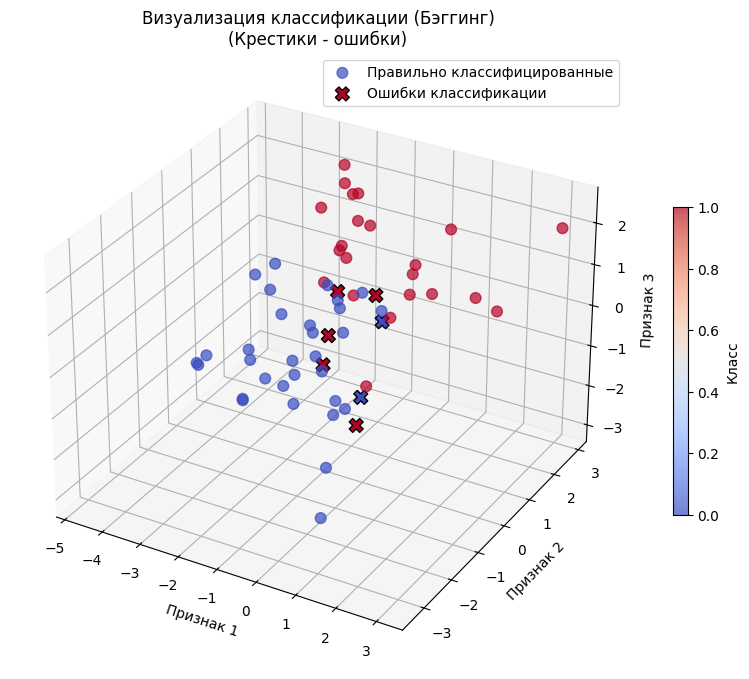

Алгоритм: Бэггинг
Всего примеров в тестовой выборке: 60
Количество ошибок классификации: 7
Точность модели: 0.883


In [ ]:
plot_classification_errors(X_test, y_test, y_pred, "Бэггинг")

# Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

boosting.fit(X_train, y_train)

y_pred = boosting.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Точность бустинга (Gradient Boosting): {accuracy:.3f}")

Точность бустинга (Gradient Boosting): 0.867


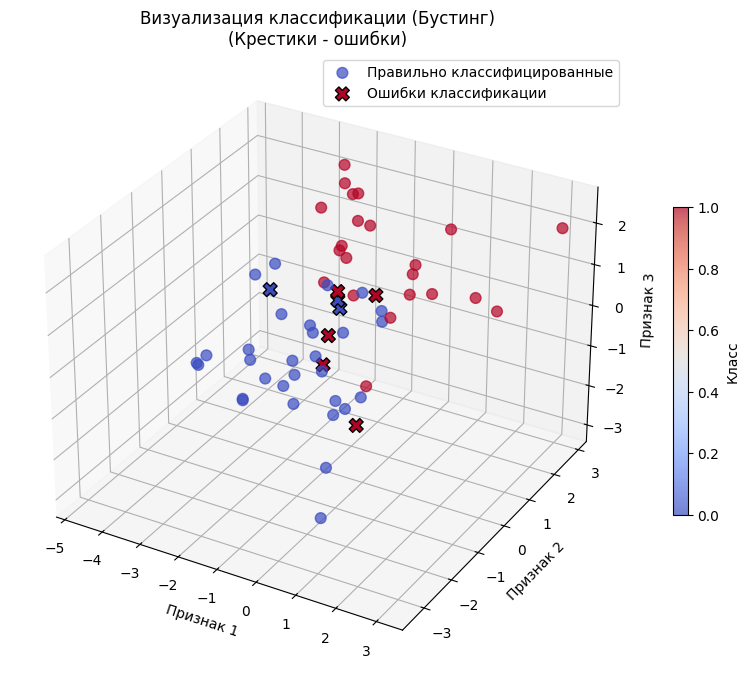

Алгоритм: Бустинг
Всего примеров в тестовой выборке: 60
Количество ошибок классификации: 8
Точность модели: 0.867


In [ ]:
plot_classification_errors(X_test, y_test, y_pred, "Бустинг")

# Стекинг

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


base_models = [
    ('tree', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(kernel='rbf', random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

meta_model = LogisticRegression(random_state=42)

stacking = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

stacking.fit(X_train, y_train)

y_pred = stacking.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Точность стекинга (дерево + SVM + k-NN): {accuracy:.3f}")

Точность стекинга (дерево + SVM + k-NN): 0.900


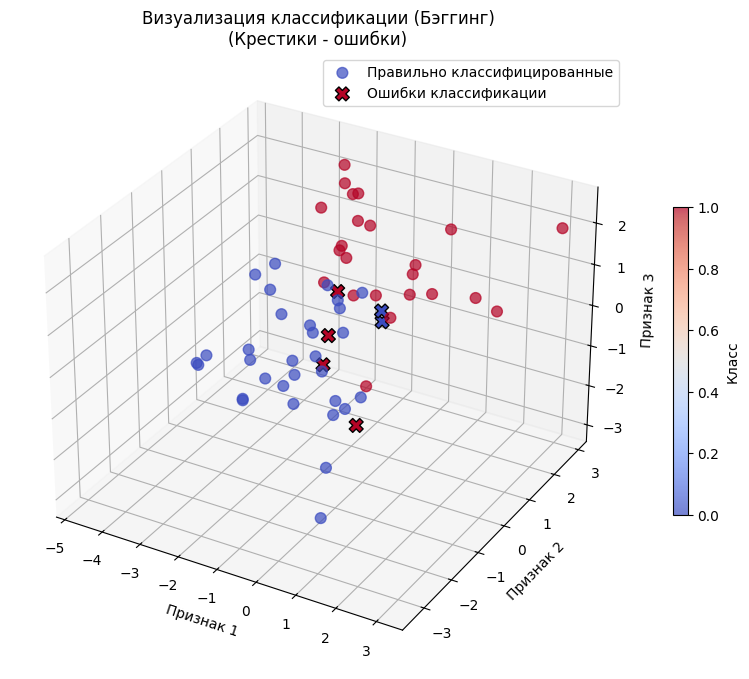

Алгоритм: Бэггинг
Всего примеров в тестовой выборке: 60
Количество ошибок классификации: 6
Точность модели: 0.900


In [ ]:
plot_classification_errors(X_test, y_test, y_pred, "Бэггинг")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, fbeta_score, confusion_matrix)

mlp = MLPClassifier(hidden_layer_sizes=(100,),  # Один скрытый слой со 100 нейронами
                    activation='relu',          # Функция активации
                    solver='sgd',              # Оптимизатор
                    max_iter=2000,              # Максимальное число итераций
                    random_state=42)            # Фиксация случайности